In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# DATA COLLECTION

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none      

# Basic information


In [3]:
df.info
df.describe


<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

# DATA PRE-PROCESSING


In [4]:
#finding dulpicate values
df.duplicated().sum()


0

In [5]:
#Checking unique values
df['gender'].unique()


array(['female', 'male'], dtype=object)

In [6]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:

df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
#Findind Null Values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# EDA

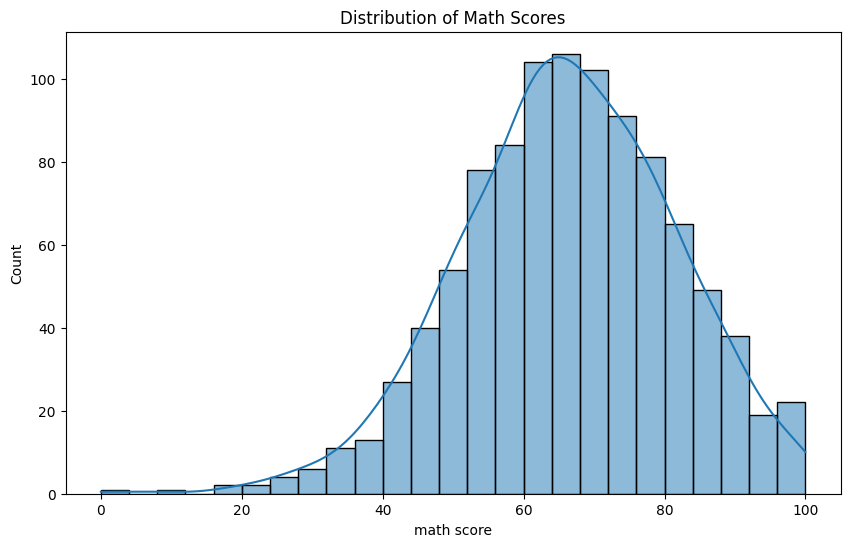

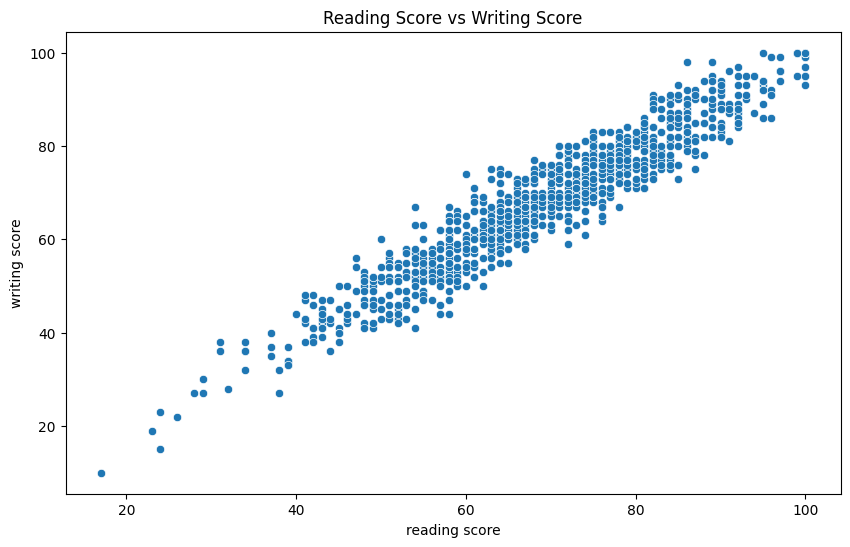

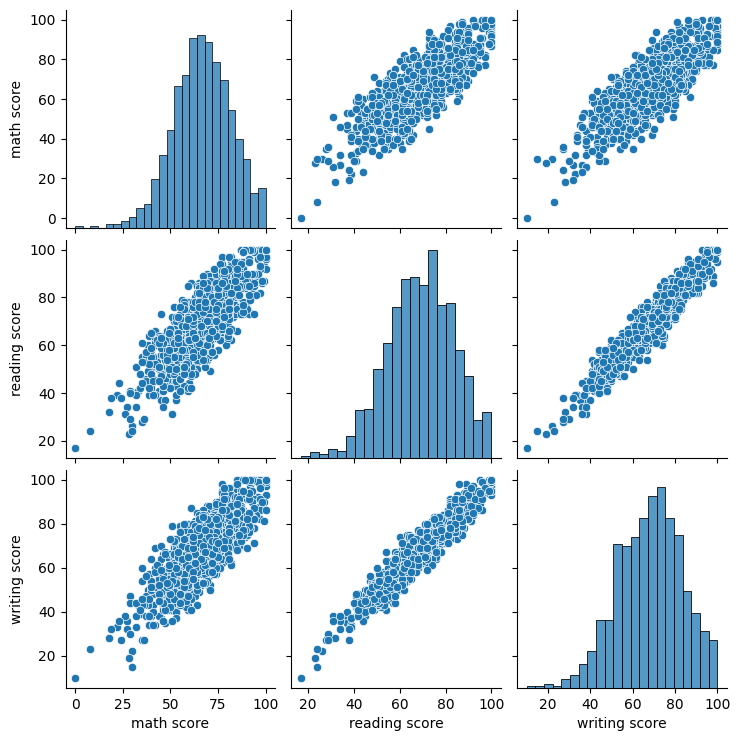

In [10]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reading score', y='writing score', data=df)
plt.title('Reading Score vs Writing Score')
plt.show()

# Multivariate Analysis
sns.pairplot(df)
plt.show()


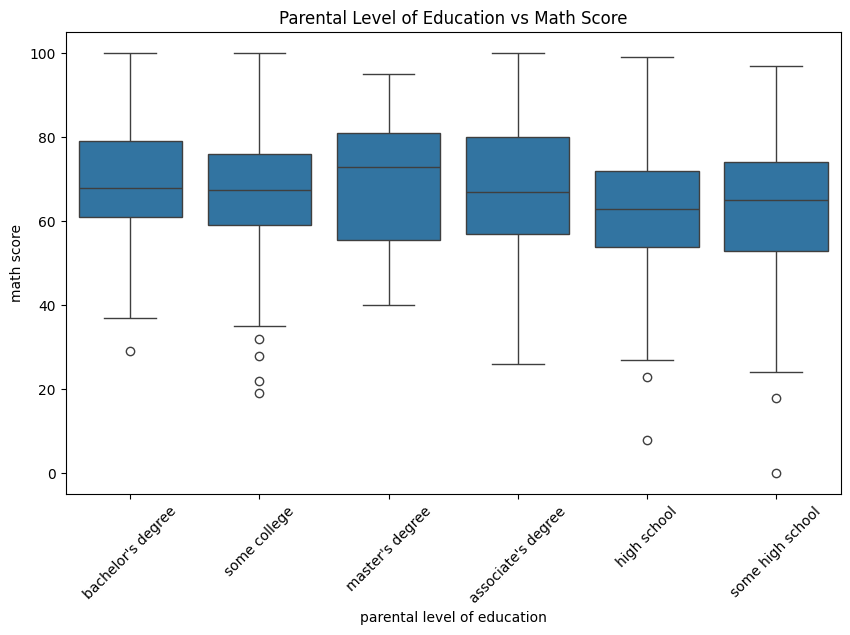

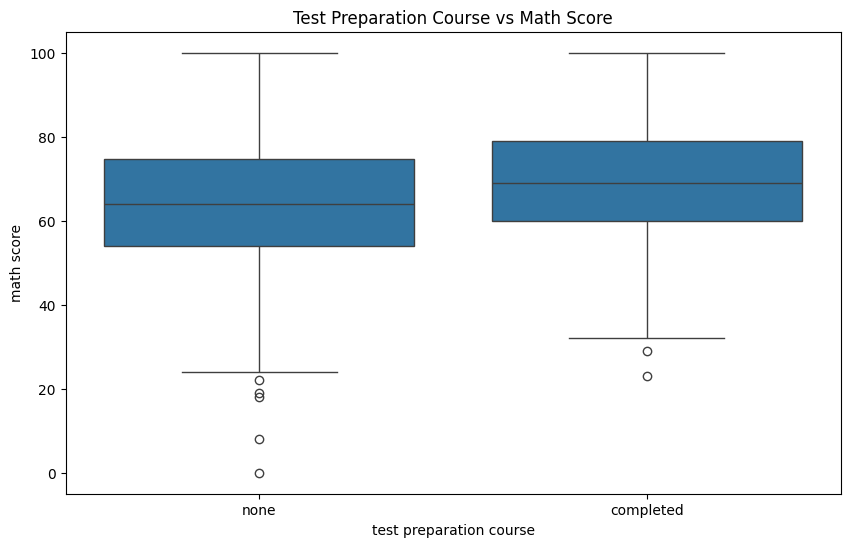

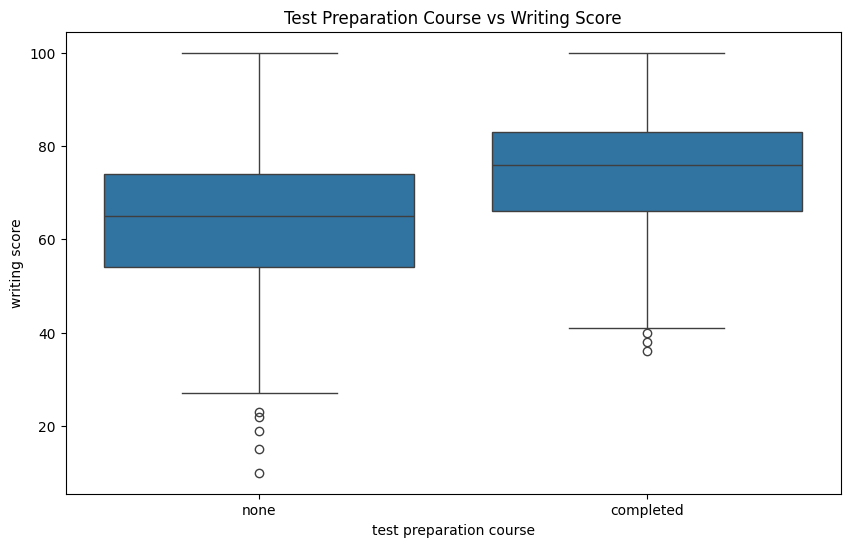

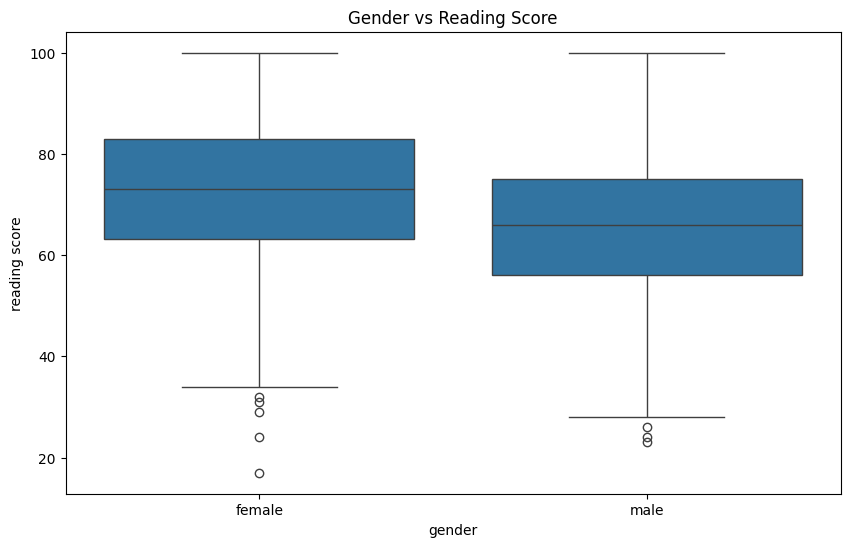

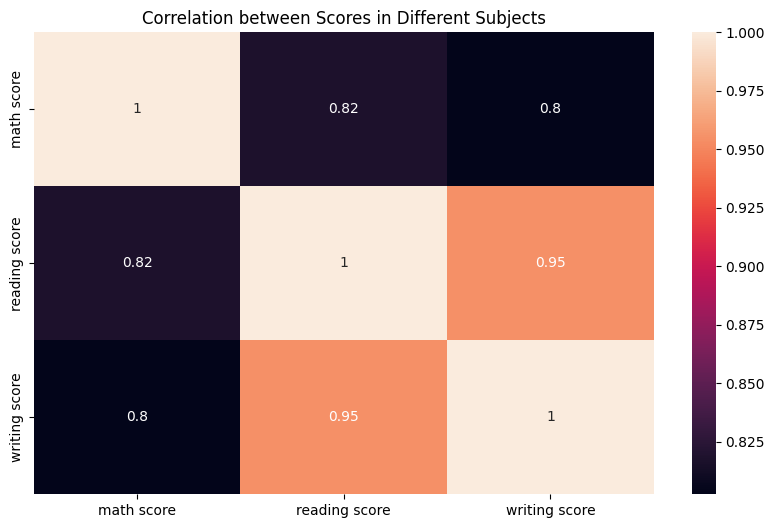

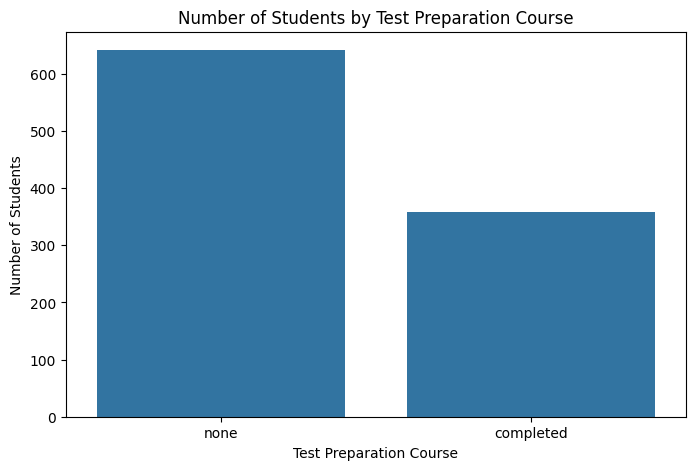

In [43]:
'''Analysis Questions
1. How does parental level of education vs students score student scores?
2. study time VS scores?
3. Do students who participate in extracurricular activities score better?
4. Are there gender differences in scores?
5. How do scores in different subjects correlate with each other?
6. test prepration completed vs not'''

# 1. Parental level of education vs. student scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Parental Level of Education vs Math Score')
plt.xticks(rotation=45)
plt.show()

# 2. Study time (represented by test preparation course) vs. scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Test Preparation Course vs Math Score')
plt.show()

# 3. Extracurricular activities vs. scores (Note: We don't have explicit extracurricular data)
# Assuming "test preparation course" as a proxy for extracurricular activities
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Test Preparation Course vs Writing Score')
plt.show()

# 4. Gender differences in scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Gender vs Reading Score')
plt.show()

# 5. Correlation between scores in different subjects
plt.figure(figsize=(10, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True)
plt.title('Correlation between Scores in Different Subjects')
plt.show()

# 6. Students test prepration completed vs none
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='test preparation course')
plt.title('Number of Students by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Number of Students')

plt.show()

# Confusion matrix

Confusion Matrix:
[[111  10]
 [ 50  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       121
           1       0.74      0.37      0.49        79

    accuracy                           0.70       200
   macro avg       0.72      0.64      0.64       200
weighted avg       0.71      0.70      0.67       200



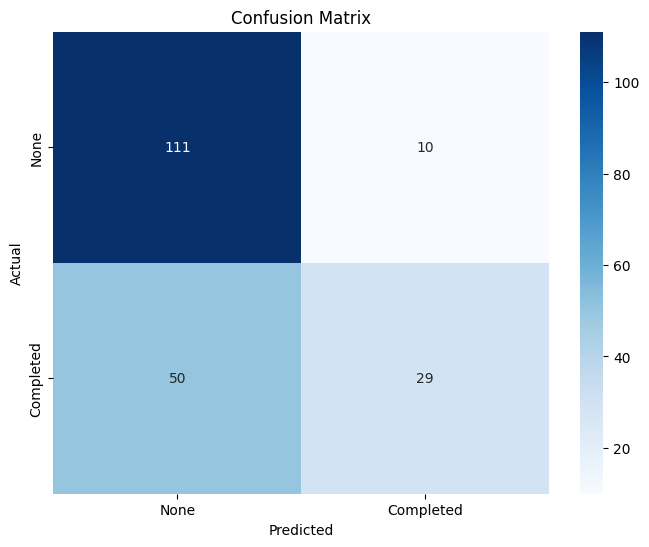

In [11]:
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})


X = df[['math score', 'reading score', 'writing score']]
y = df['test preparation course']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Completed'], yticklabels=['None', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Correlation heat map

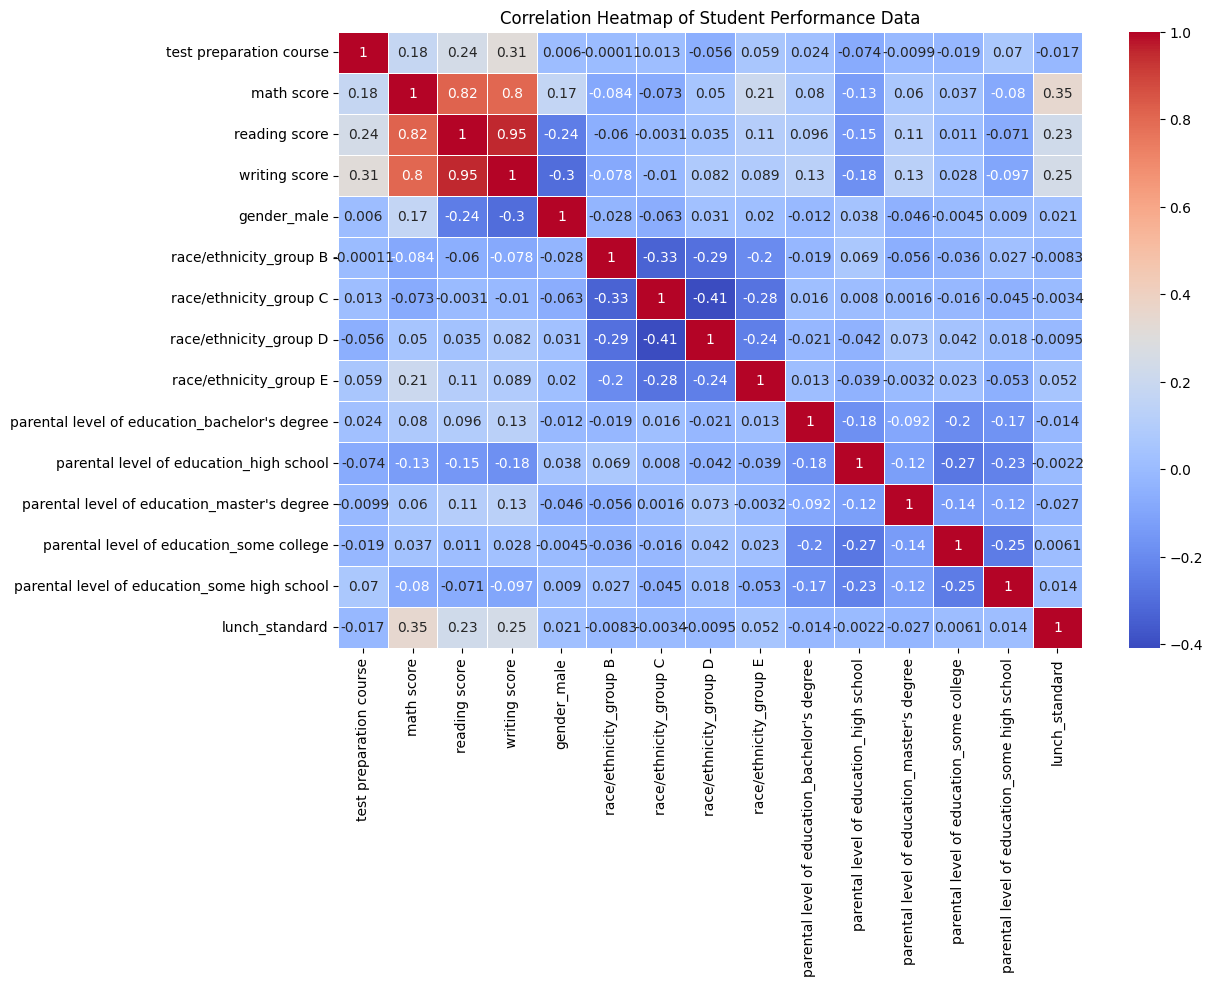

In [46]:
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Student Performance Data')
plt.show()

# DATA MODELLING

Mean Squared Error: 0.0029095169866715453
R-squared: 0.8804332983749567


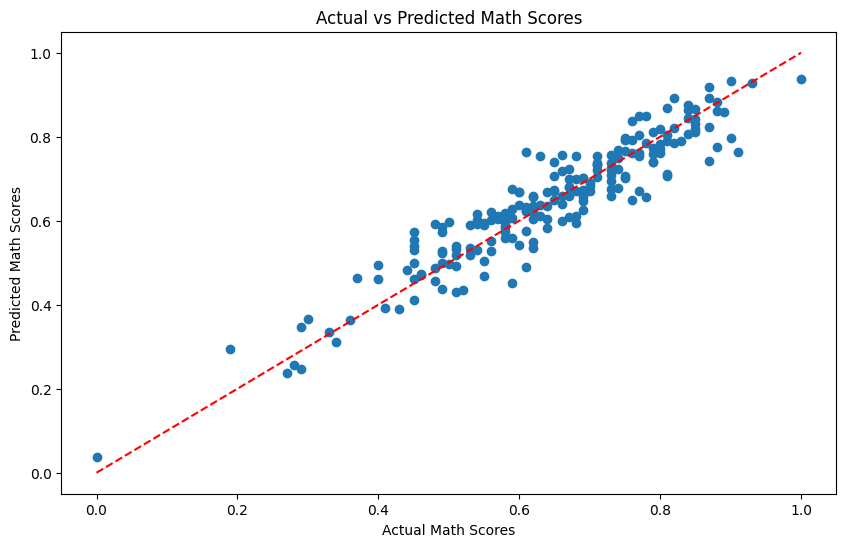

In [47]:


df_encoded = pd.get_dummies(df, drop_first=True)

# Scale numerical features using Min-Max scaling
df_encoded['math score'] = (df_encoded['math score'] - df_encoded['math score'].min()) / (df_encoded['math score'].max() - df_encoded['math score'].min())
df_encoded['reading score'] = (df_encoded['reading score'] - df_encoded['reading score'].min()) / (df_encoded['reading score'].max() - df_encoded['reading score'].min())
df_encoded['writing score'] = (df_encoded['writing score'] - df_encoded['writing score'].min()) / (df_encoded['writing score'].max() - df_encoded['writing score'].min())

# Define features and target variable
X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.plot([0, 1], [0, 1], 'r--')  # Line for reference
plt.show()